In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 3

@author: yaning
"""

import importlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

# my own class files
import threshold.Receptors as Receptors

In [26]:
importlib.reload(Receptors)

<module 'threshold.Receptors' from '/home/yaning/Documents/Spiking_NN/threshold/Receptors.py'>

In [27]:
pointCount = 6000
deltaTms = 0.05
times = np.arange(pointCount) * deltaTms
initial_Vm = 1.3458754117369027
Vm = initial_Vm
Cm = 1

In [28]:
sodium_channel = Receptors.Voltage_Sodium(initial_Vm)
potassium_channel = Receptors.Voltage_Potassium(initial_Vm)
leaky_channel = Receptors.Voltage_Leak(initial_Vm)

In [29]:
voltages = []
for i in range(pointCount):
    sodium_channel.update_gP(deltaTms)
    potassium_channel.update_gP(deltaTms)
    leaky_channel.update_gP(deltaTms)

    Ina = sodium_channel.current()
    Ik = potassium_channel.current()
    Ileak = leaky_channel.current()

    print(Ileak)

    Isum = Ina - Ik - Ileak 
    Vm += - deltaTms * Isum / Cm
    voltages.append(Vm)

    sodium_channel.Vm = Vm
    potassium_channel.Vm = Vm
    leaky_channel.Vm = Vm


-2.7762373764789285
-2.696593791652648
-2.613404787574878
-2.5260598166980976
-2.433947972297684
-2.336433166284032
-2.232831939846712
-2.1223914643082193
-2.004265740579732
-1.8774880788943356
-1.740937712063453
-1.593297862602464
-1.4330016753820702
-1.2581609909120608
-1.0664707004800247
-0.855077933170616
-0.6203997892804327
-0.35786438605312193
-0.06153518557938824
0.27644651032857137
0.6667097158624846
1.1239797722248313
1.6692143727742608
2.333158161882381
3.162466540359805
4.230633030699846
5.65810871558048
7.649949139736926
10.563878423823422
15.004890307825857
21.732842815147098
30.158754400643577
34.82591247692197
33.83885801898047
34.925437847486094
35.255017987725395
36.488983616798976
37.58896423701388
39.235335045396944
41.193712033900944
43.71318076369656
46.931246591928655
51.125808078376856
56.71774815016491
64.39489838277018
75.33373714849691
91.66359149863976
117.50094935780224
161.43043167383138
242.9138499827399
409.7159168532096
782.6995647072807
1619.46777547535

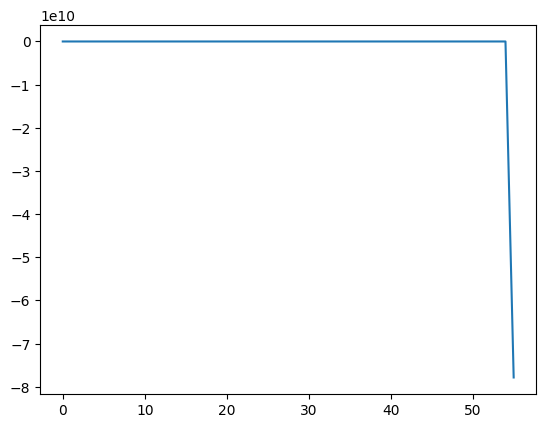

In [30]:
plt.plot(voltages)